# ABOUT ME

# My name is Usama Bin Ali.
I am an MPhil student in Bioinformatics at Hazara University, Mansehra.

I am passionate about research in computational biology, bioinformatics, and disease analysis. My academic interest is focused on using modern computational tools and protein-based models to understand complex human diseases.

# My research work is supervised by Dr. Ashfaq Ahmad, who is guiding me throughout my research journey.

Currently, I am working on a research project titled

Assessing the Impact of Alzheimer’s Disease on Cardiovascular Conditions Using Protein Large Language Models.

# STEP 1: Environment Setup

In this step, we install all the required Python libraries that are necessary for our research and data analysis work. These libraries help us handle protein sequences, biological data, machine learning, and visualization

# Purpose of Each Library


# fair-esm
This library is used for protein language models developed by Meta AI. It helps us analyze protein sequences and extract meaningful representations, which are important for understanding disease-related protein behavior.

# Biopython
Biopython provides tools for biological sequence analysis, such as reading, writing, and processing protein and DNA sequences.

Pandas
Pandas is used for data handling and management. It helps us organize datasets into tables, clean data, and perform efficient analysis.

# Matplotlib
This library is used for data visualization. It allows us to create graphs and plots to better understand patterns and results in our data.

# Scikit-learn
Scikit-learn is used for machine learning and statistical modeling. It helps in training models, evaluating performance, and analyzing results.

In [1]:
# ==========================
# STEP 1: Setup
# ==========================
!pip install fair-esm biopython pandas matplotlib scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 63.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


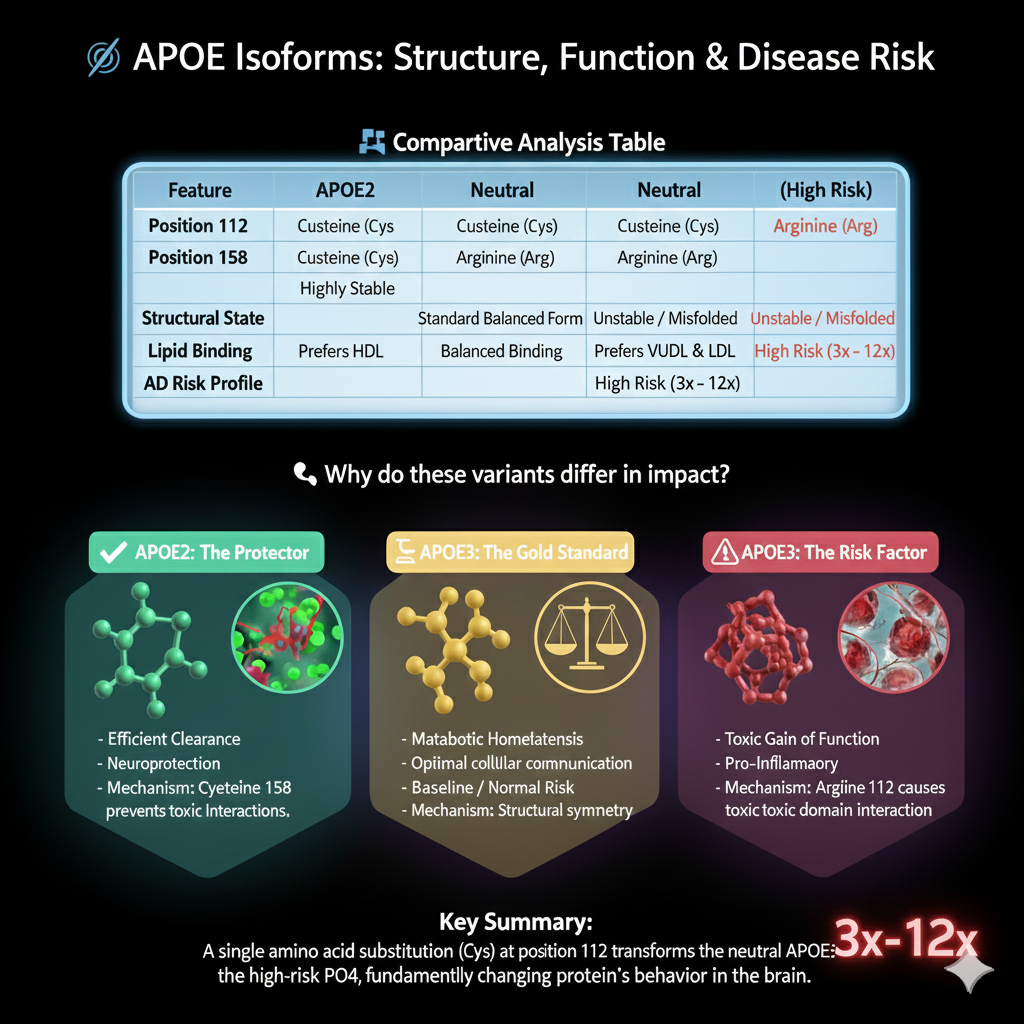

In [ ]:
from IPython.display import Image

# IMPORTANT: Replace 'path/to/your/Capture.PNG' with the actual path to your image in Google Drive.
# For example, if it's in the root of your Drive, it would be '/content/drive/My Drive/Capture.PNG'
# If it's in a folder called 'my_images', it would be '/content/drive/My Drive/my_images/Capture.PNG'
image_path = '/content/drive/MyDrive/research 1.png'

# Display the image
Image(filename=image_path)

In [3]:
# --- Step 2: Load the NACC dataset ---
import pandas as pd

# Replace with your actual file path inside Drive
file_path = '/content/drive/MyDrive/NACC_APOE_CVD_filtered.csv'  # <-- EDIT THIS PATH

# Load the file (adjust separator if TSV or Excel)
df = pd.read_csv(file_path)

# --- Step 3: Print basic info and column names ---
print("✅ File loaded successfully!")
print(f"Total rows: {len(df)}")
print("\nColumn Titles:\n")
for col in df.columns:
    print(col)


✅ File loaded successfully!
Total rows: 40686

Column Titles:

NACCID
SEX
BIRTHYR
NACCAPOE
DEMENTED
CVHATT
HATTMULT
CVAFIB
CVANGIO
CVBYPASS
CVPACDEF
CVPACE
CVCHF
CVANGINA
CVHVALVE
CVOTHR
CVOTHRX
MYOINF
CONGHRT
AFIBRILL
ANGINA
ANGIOCP
ANGIOPCI
PACEMAKE
HVALVE
CBSTROKE
STROKMUL
NACCSTYR
CBTIA
TIAMULT
NACCTIYR
HXSTROKE
PREVSTK
STROKE
STROKIF
STROKDEC
STKIMAG
CVD
CVDIF
VASC
VASCIF
VASCPS
VASCPSIF


# Total dataset
This dataset consists of 40,686 participant records containing detailed demographic, genetic, neurological, and cardiovascular health data. It includes APOE genotype information, dementia status, and multiple indicators of cardiovascular and cerebrovascular conditions such as stroke, heart disease, and vascular disorders. The data supports comprehensive analysis of the association between Alzheimer’s disease and cardiovascular health.

# load the dataset

In [4]:
import pandas as pd
import numpy as np

# ==========================
# STEP 1: Load Dataset
# ==========================
nacc = pd.read_csv("/content/drive/MyDrive/NACC_APOE_CVD_filtered.csv", dtype={'NACCID': str}, low_memory=False)

print(f"Original rows: {len(nacc)}")
print(f"Unique NACCIDs BEFORE deduplication: {nacc['NACCID'].nunique()}")

# ==========================
# STEP 2: Deduplicate by NACCID
# ==========================
# Keep only first occurrence for each subject (ensures 1 row per subject)
nacc = nacc.sort_values(by="NACCID").drop_duplicates(subset="NACCID", keep="first")
print(f"Rows AFTER deduplication: {len(nacc)}")
print(f"Unique NACCIDs AFTER deduplication: {nacc['NACCID'].nunique()}")

# ==========================
# STEP 3: Define Columns to Keep
# ==========================
columns_to_keep = [
    # Demographics & APOE
    "NACCID", "SEX", "BIRTHYR", "NACCAPOE", "DEMENTED",

    # Cardiovascular & Cerebrovascular
    "CVHATT","HATTMULT","CVAFIB","CVANGIO","CVBYPASS","CVPACDEF","CVPACE",
    "CVCHF","CVANGINA","CVHVALVE","CVOTHR","CVOTHRX","MYOINF","CONGHRT",
    "AFIBRILL","ANGINA","ANGIOCP","ANGIOPCI","PACEMAKE","HVALVE",
    "CBSTROKE","STROKMUL","NACCSTYR","CBTIA","TIAMULT","NACCTIYR","HXSTROKE",
    "PREVSTK","STROKE","STROKIF","STROKDEC","STKIMAG","CVD","CVDIF","VASC",
    "VASCIF","VASCPS","VASCPSIF",
]

# Keep only columns that exist in the dataset
columns_to_keep = [col for col in columns_to_keep if col in nacc.columns]
filtered_df = nacc[columns_to_keep].copy()

# ==========================
# STEP 4: Handle Missing Values
# ==========================
filtered_df = filtered_df.replace([9, 99, -4, -8], np.nan)

# Drop rows without APOE info
filtered_df = filtered_df.dropna(subset=["NACCAPOE"])

# ==========================
# STEP 5: Save Clean Dataset
# ==========================
filtered_df.to_csv("NACC_APOE_CVD_filtered.csv", index=False)
print(f"✅ Clean dataset saved: {filtered_df.shape[0]} rows, {filtered_df.shape[1]} columns")

# ==========================
# STEP 6: Quick Descriptive Stats
# ==========================
print("\n📊 Basic Descriptive Statistics (Counts of Each Condition):")
numeric_df = filtered_df.select_dtypes(include=[np.number])
condition_counts = numeric_df.apply(pd.Series.value_counts).T.fillna(0).astype(int)

if 1 in condition_counts.columns:
    top_conditions = condition_counts.sort_values(by=1, ascending=False).head(20)
else:
    top_conditions = condition_counts.head(20)

display(top_conditions)

print("\nPreview of Cleaned Dataset:")
display(filtered_df.head())


Original rows: 40686
Unique NACCIDs BEFORE deduplication: 40686
Rows AFTER deduplication: 40686
Unique NACCIDs AFTER deduplication: 40686
✅ Clean dataset saved: 40686 rows, 43 columns

📊 Basic Descriptive Statistics (Counts of Each Condition):


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,1896.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,8888.0,9999.0
NACCAPOE,0,20314,12776,3630,2737,1051,178,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SEX,0,17659,23027,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DEMENTED,26044,14642,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVOTHR,26185,2199,1152,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVAFIB,27204,1692,640,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVD,17321,1443,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AFIBRILL,17323,1351,0,0,0,0,0,0,90,0,...,0,0,0,0,0,0,0,0,0,0
STROKE,21010,912,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVPACE,21054,742,105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CVANGIO,27499,730,1395,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Preview of Cleaned Dataset:


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,STROKE,STROKIF,STROKDEC,STKIMAG,CVD,CVDIF,VASC,VASCIF,VASCPS,VASCPSIF
0,NACC000011,2,1944,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,NaN,NaN
1,NACC000034,2,1935,4.0,0,0.0,8.0,0.0,0.0,0.0,...,NaN,NaN,8.0,8.0,0.0,7.0,NaN,NaN,NaN,NaN
2,NACC000067,1,1952,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,0.0,7.0
3,NACC000095,1,1926,2.0,1,0.0,NaN,0.0,0.0,0.0,...,0.0,7.0,NaN,NaN,NaN,NaN,0.0,7.0,0.0,7.0
4,NACC000144,1,1930,1.0,0,0.0,NaN,1.0,0.0,0.0,...,0.0,8.0,NaN,NaN,NaN,NaN,8.0,8.0,8.0,8.0


# Dataset Cleaning and Validation Summary

# Original dataset size: 40,686 rows

# Unique participant IDs (NACCID) before deduplication: 40,686

# Rows after deduplication: 40,686

# Unique participant IDs after deduplication: 40,686

# No duplicate records were detected in the dataset. Each row represents a unique participant.

# ✅ The final cleaned dataset contains 40,686 rows and 43 columns, ensuring data integrity and readiness for further analysis.

# Mapping NACCAPOE Codes to APOE Genotypes

In this step, the numeric NACCAPOE codes are converted into their corresponding true APOE genotypes. This transformation makes the genetic information more biologically meaningful and easier to interpret for analysis.

# Each numeric code is mapped to a standard APOE allele combination (ε2, ε3, ε4). The mapped genotypes are stored in a new column called APOE_Label.

# Codes 7, 8, and 9 represent missing or unknown genotype information and are therefore left as NaN, as they were handled earlier during data cleaning.

After mapping, the distribution of APOE genotypes is displayed, excluding missing values, and the total number of missing genotypes is reported. This step ensures accurate representation of APOE genetic variability, which is essential for studying its role in Alzheimer’s disease and cardiovascular conditions.

In [5]:
# ==========================
# STEP 3: Map NACCAPOE to True Genotype
# ==========================
apoe_map = {
    1: "ε2/ε2",
    2: "ε2/ε3",
    3: "ε3/ε3",
    4: "ε2/ε4",
    5: "ε3/ε4",
    6: "ε4/ε4"
    # 7, 8, 9 will remain NaN (already handled earlier)
}

filtered_df["APOE_Label"] = filtered_df["NACCAPOE"].map(apoe_map)

print("APOE Genotype Distribution (excluding missing):")
print(filtered_df["APOE_Label"].value_counts(dropna=True))
print("\nNumber of missing APOE genotypes:", filtered_df["APOE_Label"].isna().sum())


APOE Genotype Distribution (excluding missing):
APOE_Label
ε2/ε2    20314
ε2/ε3    12776
ε3/ε3     3630
ε2/ε4     2737
ε3/ε4     1051
ε4/ε4      178
Name: count, dtype: int64

Number of missing APOE genotypes: 0


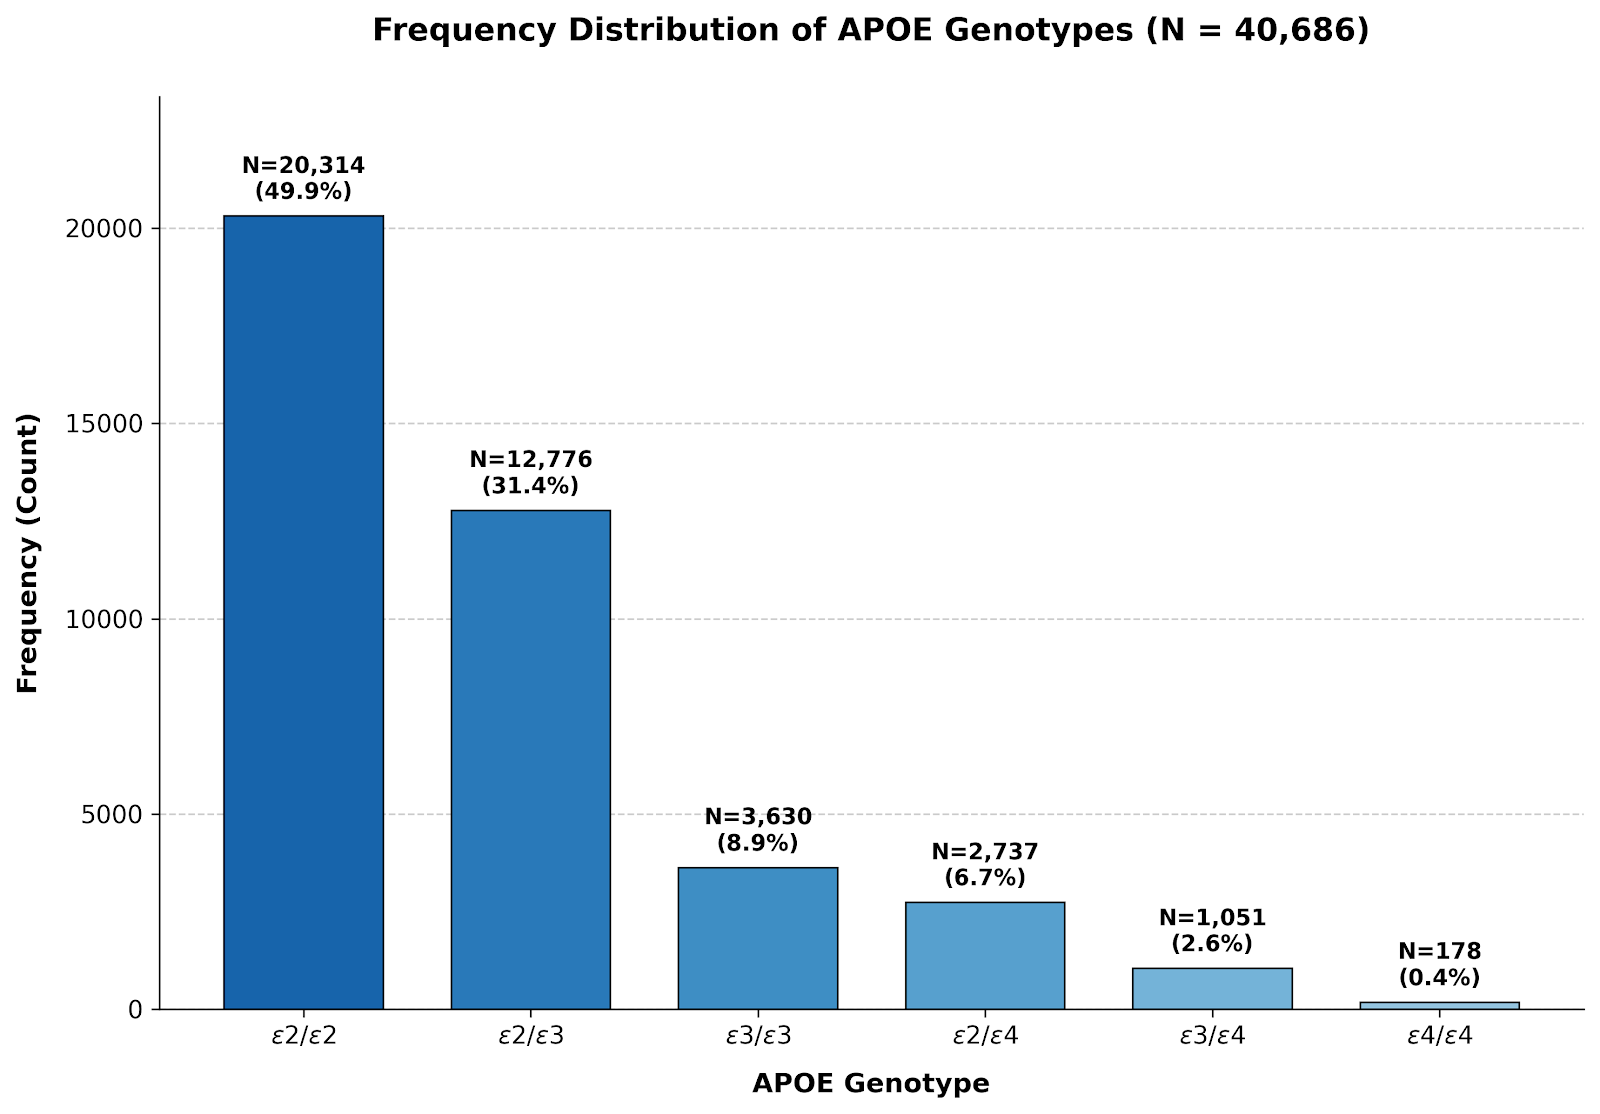

In [8]:
from IPython.display import Image

# IMPORTANT: Replace 'path/to/your/Capture.PNG' with the actual path to your image in Google Drive.
# For example, if it's in the root of your Drive, it would be '/content/drive/My Drive/Capture.PNG'
# If it's in a folder called 'my_images', it would be '/content/drive/My Drive/my_images/Capture.PNG'
image_path = '/content/drive/MyDrive/apoe distr pic.png'

# Display the image
Image(filename=image_path)


# STEP 4: APOE Isoform Sequence Generation

# In this step, the reference APOE protein sequence is downloaded from UniProt and parsed using Biopython. Residues 112 and 158 of the mature protein are identified to determine the reference isoform. Based on these positions, the remaining APOE isoforms (APOE2, APOE3, APOE4) are generated by applying targeted amino acid substitutions. All isoform sequences are saved in APOE_isoforms.fasta, providing accurate, standardized sequences for downstream structural and computational analyses

In [6]:
from urllib.request import urlopen
from Bio import SeqIO

# ==========================
# STEP 4: Get APOE Reference Protein Sequence
# ==========================
url = "https://rest.uniprot.org/uniprotkb/P02649.fasta"
fasta_str = urlopen(url).read().decode()

with open("APOE.fasta", "w") as f:
    f.write(fasta_str)

record = list(SeqIO.parse("APOE.fasta", "fasta"))[0]
apoe_seq = str(record.seq)

print(f"✅ Downloaded APOE reference sequence: {record.id}")
print(f"APOE reference length: {len(apoe_seq)} aa")

# Adjust for signal peptide (offset = 18)
offset = 18
res_112 = apoe_seq[111 + offset]
res_158 = apoe_seq[157 + offset]

print(f"Residue 112 (mature): {res_112}")
print(f"Residue 158 (mature): {res_158}")

def mutate_sequence(seq, mutations):
    seq_list = list(seq)
    for pos, aa in mutations.items():
        true_pos = pos + offset  # adjust for UniProt numbering
        original = seq_list[true_pos - 1]
        seq_list[true_pos - 1] = aa
        print(f"Mutation applied at position {pos} (UniProt {true_pos}): {original} → {aa}")
    return "".join(seq_list)

# Determine isoform type
if res_112 == "C" and res_158 == "R":
    print("Reference appears to be APOE3 (Cys112, Arg158)")
    apoe3_seq = apoe_seq
    apoe2_seq = mutate_sequence(apoe3_seq, {158: "C"})
    apoe4_seq = mutate_sequence(apoe3_seq, {112: "R"})

elif res_112 == "C" and res_158 == "C":
    print("Reference appears to be APOE2 (Cys112, Cys158)")
    apoe2_seq = apoe_seq
    apoe3_seq = mutate_sequence(apoe2_seq, {158: "R"})
    apoe4_seq = mutate_sequence(apoe3_seq, {112: "R"})

elif res_112 == "R" and res_158 == "R":
    print("Reference appears to be APOE4 (Arg112, Arg158)")
    apoe4_seq = apoe_seq
    apoe3_seq = mutate_sequence(apoe4_seq, {112: "C"})
    apoe2_seq = mutate_sequence(apoe3_seq, {158: "C"})

else:
    raise ValueError(f"Unexpected residue combination: 112={res_112}, 158={res_158}")

# Store isoforms
isoforms = {"APOE2": apoe2_seq, "APOE3": apoe3_seq, "APOE4": apoe4_seq}

with open("APOE_isoforms.fasta", "w") as f:
    for name, seq in isoforms.items():
        f.write(f">{name}\n{seq}\n")

print("\n✅ APOE isoform sequences saved to APOE_isoforms.fasta")


✅ Downloaded APOE reference sequence: sp|P02649|APOE_HUMAN
APOE reference length: 317 aa
Residue 112 (mature): C
Residue 158 (mature): R
Reference appears to be APOE3 (Cys112, Arg158)
Mutation applied at position 158 (UniProt 176): R → C
Mutation applied at position 112 (UniProt 130): C → R

✅ APOE isoform sequences saved to APOE_isoforms.fasta


# next step
# Generate Protein Embeddings:

 Loaded the ESM-2 protein language model and generated numerical embeddings for each APOE isoform.

# Map Patients to Embeddings:

 Assigned embeddings to patients based on APOE genotype, averaging embeddings for heterozygous genotypes, and using NaN for missing genotypes.

# Save Final Dataset:
 Expanded embeddings into individual columns, merged with clinical/genetic data, and saved as NACC_with_APOE_embeddings.csv for downstream analyses

In [7]:
import torch
import esm

# ==========================
# STEP 6: Load ESM-2 Model and Generate Embeddings
# ==========================
model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()

def get_embedding(seq):
    data = [("protein", seq)]
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[33], return_contacts=False)
    token_representations = results["representations"][33]
    return token_representations.mean(1).cpu().numpy().flatten()

embeddings = {name: get_embedding(seq) for name, seq in isoforms.items()}
print(f"Generated embeddings: {list(embeddings.keys())}")

# ==========================
# STEP 7: Link Patients to Correct Embedding
# ==========================
def assign_embedding(row):
    if row["APOE_Label"] == "ε2/ε2":
        return embeddings["APOE2"]
    elif row["APOE_Label"] == "ε3/ε3":
        return embeddings["APOE3"]
    elif row["APOE_Label"] == "ε4/ε4":
        return embeddings["APOE4"]
    elif row["APOE_Label"] == "ε2/ε3":
        return (embeddings["APOE2"] + embeddings["APOE3"]) / 2
    elif row["APOE_Label"] == "ε2/ε4":
        return (embeddings["APOE2"] + embeddings["APOE4"]) / 2
    elif row["APOE_Label"] == "ε3/ε4":
        return (embeddings["APOE3"] + embeddings["APOE4"]) / 2
    else:
        return np.full_like(embeddings["APOE3"], np.nan)

filtered_df["APOE_Embedding"] = filtered_df.apply(assign_embedding, axis=1)

# ==========================
# STEP 8: Save Final Dataset
# ==========================
# Expand embeddings into separate columns
embedding_dim = len(embeddings["APOE3"])
embedding_df = pd.DataFrame(filtered_df["APOE_Embedding"].tolist(),
                            columns=[f"APOE_emb_{i}" for i in range(embedding_dim)])
final_df = pd.concat([filtered_df.reset_index(drop=True).drop(columns=["APOE_Embedding"]),
                      embedding_df], axis=1)

final_df.to_csv("NACC_with_APOE_embeddings.csv", index=False)
print(f"Final dataset saved with shape: {final_df.shape}")
final_df.head()

Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /root/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt
Generated embeddings: ['APOE2', 'APOE3', 'APOE4']
Final dataset saved with shape: (40686, 1324)


,NACCID,SEX,BIRTHYR,NACCAPOE,DEMENTED,CVHATT,HATTMULT,CVAFIB,CVANGIO,CVBYPASS,...,APOE_emb_1270,APOE_emb_1271,APOE_emb_1272,APOE_emb_1273,APOE_emb_1274,APOE_emb_1275,APOE_emb_1276,APOE_emb_1277,APOE_emb_1278,APOE_emb_1279
0,NACC000011,2,1944,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
1,NACC000034,2,1935,4.0,0,0.0,8.0,0.0,0.0,0.0,...,0.029459,0.060854,-0.216327,-0.046146,0.028633,-0.137867,0.028962,0.028452,0.106297,0.073913
2,NACC000067,1,1952,1.0,0,0.0,NaN,0.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211
3,NACC000095,1,1926,2.0,1,0.0,NaN,0.0,0.0,0.0,...,0.031572,0.061135,-0.215944,-0.047036,0.029139,-0.139580,0.030371,0.026543,0.105472,0.075763
4,NACC000144,1,1930,1.0,0,0.0,NaN,1.0,0.0,0.0,...,0.032261,0.060560,-0.216049,-0.048097,0.029793,-0.140465,0.032509,0.024999,0.105604,0.076211


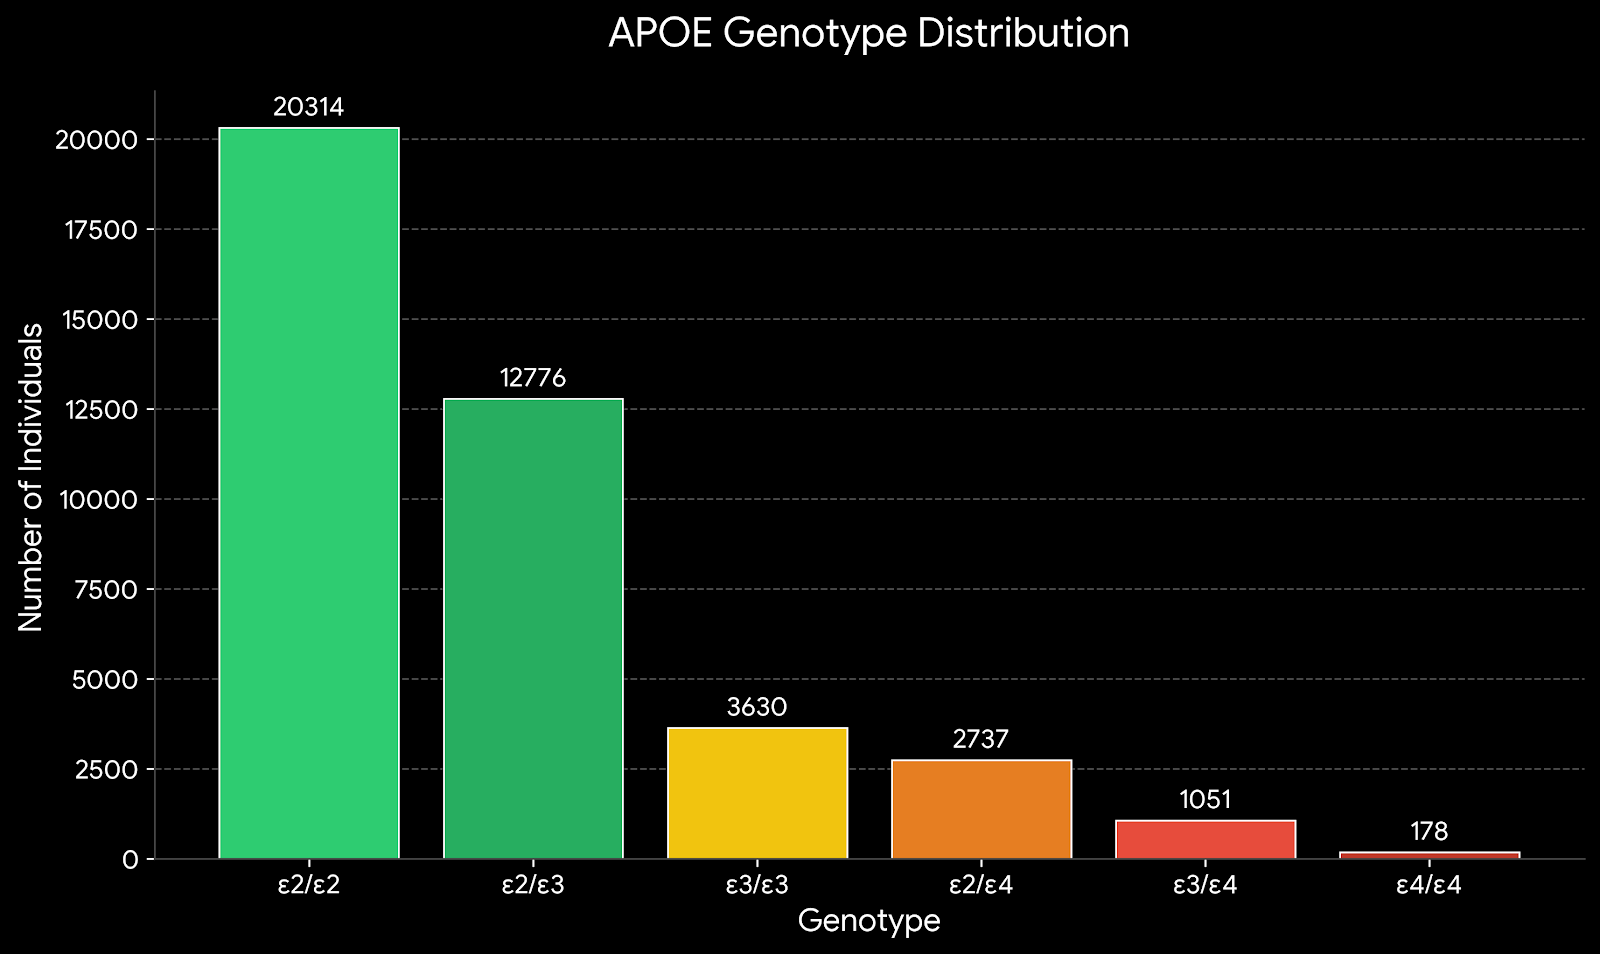

In [ ]:
from IPython.display import Image

# IMPORTANT: Replace 'path/to/your/Capture.PNG' with the actual path to your image in Google Drive.
# For example, if it's in the root of your Drive, it would be '/content/drive/My Drive/Capture.PNG'
# If it's in a folder called 'my_images', it would be '/content/drive/My Drive/my_images/Capture.PNG'
image_path = '/content/drive/MyDrive/Code_Generated_Image.png'

# Display the image
Image(filename=image_path)

# Visualization of Cardiovascular Conditions Across APOE Genotypes
Purpose

This analysis aims to visually compare the distribution of major cardiovascular conditions across different APOE genotypes. By stratifying patients based on their APOE allele combinations, the plot highlights potential genotype-specific differences in cardiovascular disease prevalence.

# Selected Cardiovascular Conditions

The visualization focuses on clinically relevant cardiovascular outcomes, including:

Hypertension

Stroke

Myocardial Infarction

Heart Failure

Angina Pectoris

Only variables with valid, non-missing data were included to ensure reliable and interpretable results

/tmp/ipython-input-4061457773.py:54: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(
/tmp/ipython-input-4061457773.py:54: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.countplot(


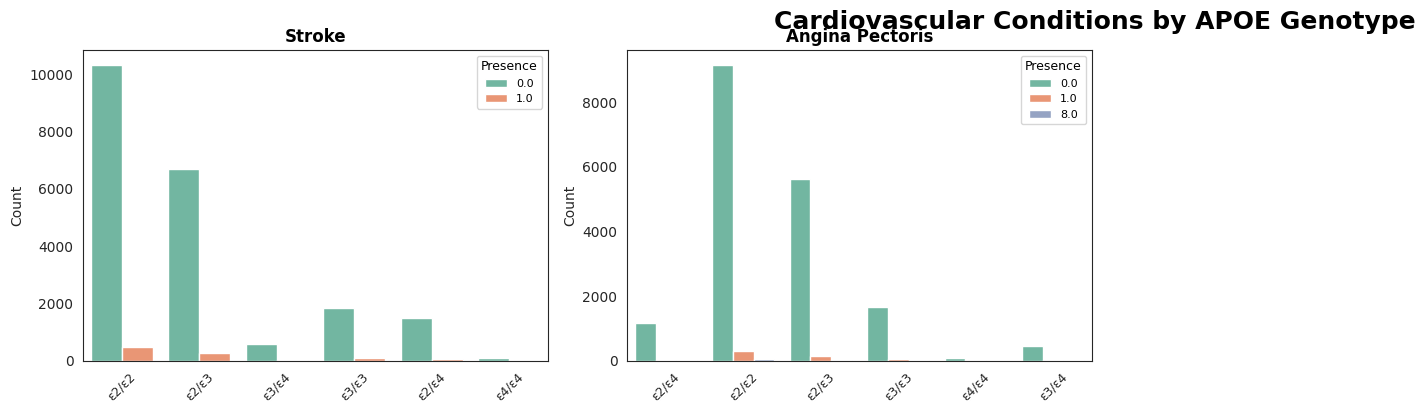

✅ High-resolution figure saved at: /content/Cardiovascular_Conditions_by_APOE.png (2 subplots included)


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==========================
# Combined Multi-Panel Plot: Cardiovascular Conditions vs APOE Genotype
# ==========================

# --- Replace neurological with cardiovascular ---
# Example: if you already have a list of cardiovascular-related columns
# (e.g., hypertension, stroke, myocardial_infarction, etc.)
cardiovascular_cols = [
    "HYPERTENSION", "STROKE", "MYOCARDIAL_INFARCTION", "HEART_FAILURE", "ANGINA"
]
# You can also auto-detect them if needed, e.g.:
# cardiovascular_cols = [col for col in filtered_df.columns if "CARDIO" in col.upper()]

# Ensure only valid columns (exist + at least 1 non-NaN)
valid_conditions = [
    col for col in cardiovascular_cols
    if col in filtered_df.columns and filtered_df[col].notna().sum() > 0
]

n_conditions = len(valid_conditions)
if n_conditions == 0:
    raise ValueError("No cardiovascular columns found with data.")

# Layout configuration
n_cols = 4  # Number of plots per row
n_rows = (n_conditions + n_cols - 1) // n_cols  # Auto-calculate rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 4 * n_rows))
axes = axes.flatten()

# Use a visually distinct color palette
custom_palette = sns.color_palette("Set2")  # Softer and clear for publications

# Optional mapping for nicer subplot titles
condition_names = {
    "HYPERTENSION": "Hypertension",
    "STROKE": "Stroke",
    "MYOCARDIAL_INFARCTION": "Myocardial Infarction",
    "HEART_FAILURE": "Heart Failure",
    "ANGINA": "Angina Pectoris"
}

plot_index = 0
for col in valid_conditions:
    ax = axes[plot_index]
    temp_df = filtered_df.dropna(subset=[col])
    if temp_df.empty:
        continue

    sns.countplot(
        data=temp_df,
        x="APOE_Label",       # changed to your actual APOE column name
        hue=col,
        palette=custom_palette,
        ax=ax
    )

    ax.set_title(condition_names.get(col, col.replace("_", " ").title()),
                 fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=9)
    ax.legend(title="Presence", loc="upper right", fontsize=8, title_fontsize=9)

    plot_index += 1

# Remove unused axes
for j in range(plot_index, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Cardiovascular Conditions by APOE Genotype",
             fontsize=18, fontweight="bold", y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# ====== 🔽 Save High-Resolution Figure ======
output_path = "/content/Cardiovascular_Conditions_by_APOE.png"
plt.savefig(output_path, dpi=800, bbox_inches="tight")
plt.show()

print(f"✅ High-resolution figure saved at: {output_path} ({plot_index} subplots included)")
